<a href="https://colab.research.google.com/github/ADB-stark/Demo-LinkedIn/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Engineering
###Data Collection

In [44]:
import urllib.request
urllib.request.urlretrieve("https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv",
                           "/content/datas/cust.csv")

('/content/datas/cust.csv', <http.client.HTTPMessage at 0x7f452a2b7340>)

###Importing data analysis libraries

Installing dependencies

In [41]:
!pip install zipfile36

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
#pd.pandas.set_option('display.max_columns',None) #To make sure all the columns are displayed
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [55]:
#We read the csv and print the first 5 rows
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})
print(df.shape)
#Looking for null values
df.isna().sum()
#Checking datatypes
df.info()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
#Replacing objects for numerical values
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

###Data Visualization

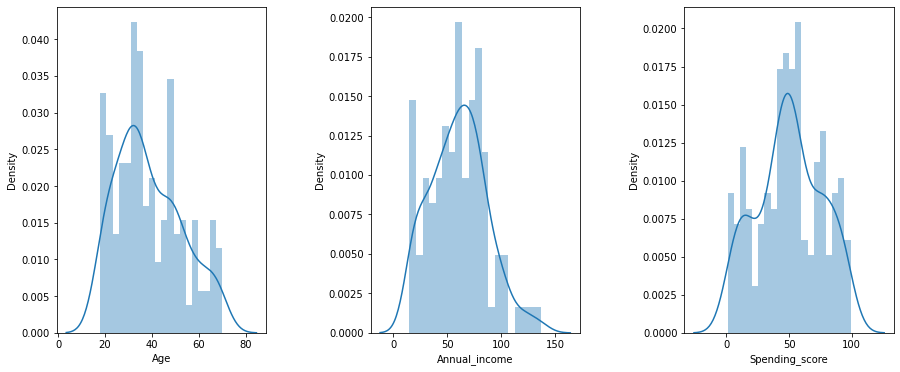

0    112
1     88
Name: Gender, dtype: int64

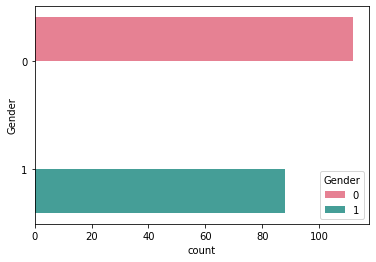

In [61]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
feature_listt = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

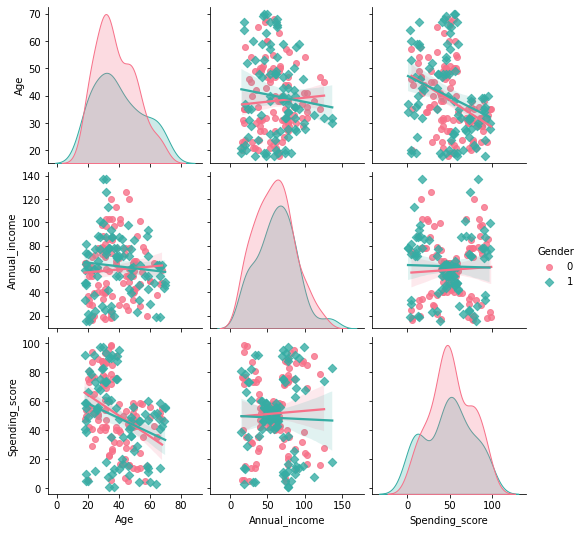

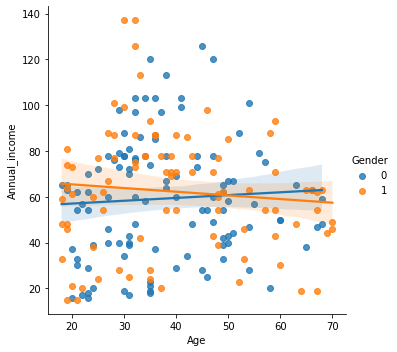

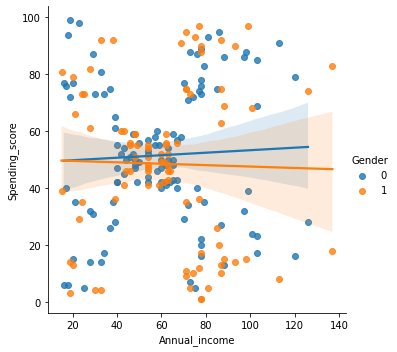

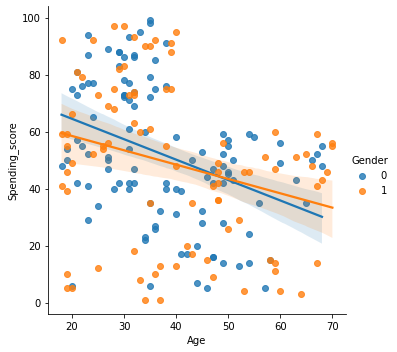

In [68]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])


#age & annual income 
sns.lmplot(x = "Age", y = "Annual_income", data = df, hue = "Gender")
sns.lmplot(x = "Annual_income", y = "Spending_score", data = df, hue = "Gender")
sns.lmplot(x = "Age", y = "Spending_score", data = df, hue = "Gender")

In [70]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_


#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['Spending_score'],
    y= X['Annual_income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)